In [1]:
from __future__ import print_function
import pylab as pl
import pandas as pd
import numpy as np
import zipfile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
datestring = '201502' #Citibike data from February 2016
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
feb_data = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  11.1M      0 --:--:-- --:--:-- --:--:-- 18.2M


In [8]:
feb_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [15]:
#Calculate age of riders based on Birth Year
feb_data['rider_age'] = 2015 - feb_data['birth year'][(feb_data['usertype'] == 'Subscriber')]

In [18]:
feb_data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'rider_age'],
      dtype='object')

In [19]:
feb_data = feb_data[['rider_age']] #keeping only the column with age

In [20]:
feb_data.head() #test to see if drop was successful

,rider_age
0,37.0
1,22.0
2,46.0
3,30.0
4,58.0


In [24]:
feb_data['rider_age'].dropna(inplace=True) #dropping all NaN values
feb_data.describe()

,rider_age
count,194663.000000
mean,39.711969
std,11.734009
min,16.000000
25%,NaN
50%,NaN
75%,NaN
max,116.000000


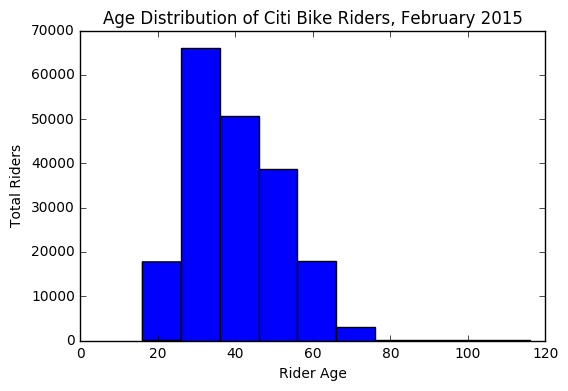

In [25]:
pl.hist(feb_data.rider_age)
pl.title('Age Distribution of Citi Bike Riders, February 2015')
pl.xlabel('Rider Age')
pl.ylabel('Total Riders')

# Figure 1: Age Distribution of Citibike Riders, February 2015

### Based on this sample, which is beginning to resemble a Normal distribution. We can project that if 11 additonal months of Citibike Rider data were sampled, the Gaussian distribution will become more defined. 

### Kolmogrov-Smirnov (KS) TEST

#### The age distribution of Citibike riders demonstrates a normal distribution.
#### H0: D(age) = D(normal)

#### The age distribution of Citibike riders demonstrates a logistic distribution.
#### H1: D(age) = D(logistic)
#### alpha = 0.05


In [28]:
import scipy.stats

In [32]:
print ( scipy.stats.kstest(feb_data['rider_age'],'norm'))
print ( scipy.stats.kstest(feb_data['rider_age'],'logistic')) 

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.99999988746483792, pvalue=0.0)


### The Null Hypothesis (H0) does not get rejected as a result of the KS Test. According to the critical values table c(alpha) for alpha = 0.05 is 1.36. The D statistics of 1.0 and .999 are not greater than the critical value, the null is not rejected.

#
#
#


## Anderson Darling Test
#### The age distribution of Citibike riders demonstrates a normal distribution.
#### H0: P(sample) = P(normal)

#### The age distribution of Citibike riders demonstrates a logistic distribution.
#### H1: P(age) = P(logistic)
#### alpha = 0.05

print ("Normal Distribution Comparison", scipy.stats.anderson(df['age'], dist='norm'))
print ("Logistic Ditribution Comparison", scipy.stats.anderson(df['age'], dist='logistic'))

In [34]:
print ("Normal Distribution Comparison", scipy.stats.anderson(feb_data['rider_age'], dist='norm'))
print ("Logistic Ditribution Comparison", scipy.stats.anderson(feb_data['rider_age'], dist='logistic'))

Normal Distribution Comparison AndersonResult(statistic=1838.2805286566727, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Logistic Ditribution Comparison AndersonResult(statistic=1962.0028196771746, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


### Because the critical values for the AD test are larger than the critical value, the null hypothesis is rejected